In [130]:
import csv
import time
import numpy as np
import pandas as pd
import pylab as plt
import networkx as nx
import statistics
# from pecanpy import node2vec
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

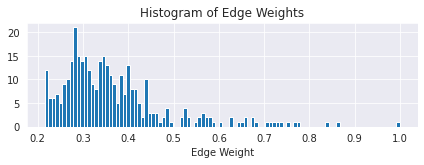

In [90]:
# TO BE DELETED
# subgraph_adj1 = pd.read_csv('../Data/FEV1_Adjacency.csv', index_col=0).to_numpy()
# subgraph1 = nx.from_numpy_matrix(subgraph_adj1)
# nx.draw(subgraph1, with_labels=True)
# # Plotting the Histogram of Edge Weights
# plt.subplot(2, 1, 2)
# weights = nx.get_edge_attributes(subgraph1, 'weight').values()
# plt.hist(weights, bins=100)
# plt.xlabel('Edge Weight')
# plt.title('Histogram of Edge Weights')
# plt.tight_layout()

0.5579710144927537

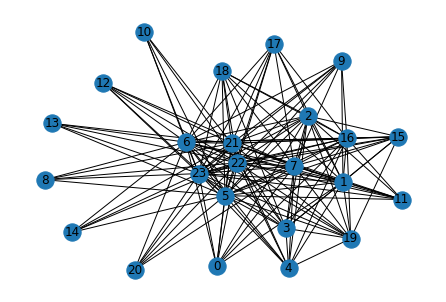

In [127]:
# TO BE DELETED
# s = nx.from_numpy_matrix(pd.read_csv('../Data/trimmed_pctEmph_0.099_adj.csv', index_col=0).to_numpy())
# nx.draw(s, with_labels=True)
# nx.density(s)

0.5579710144927537

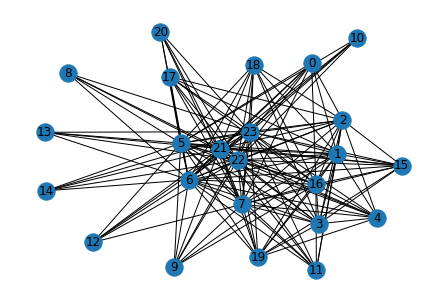

In [129]:
s = nx.from_numpy_matrix(pd.read_csv('../Data/trimmed_pctEmph_0.099_Adjacency.csv', index_col=0).to_numpy())
nx.draw(s, with_labels=True)
nx.density(s)

[(10, 14, {'weight': 0.0640145275972586}),
 (8, 14, {'weight': 0.0641588188354611}),
 (13, 14, {'weight': 0.0653289653011487}),
 (8, 13, {'weight': 0.0660056574133637}),
 (12, 14, {'weight': 0.0677475467243582}),
 (10, 13, {'weight': 0.067846668940096}),
 (8, 10, {'weight': 0.0681982192392463}),
 (14, 20, {'weight': 0.0694408692569951}),
 (10, 12, {'weight': 0.0694785138688268}),
 (8, 20, {'weight': 0.0708361666607724}),
 (8, 12, {'weight': 0.0712564841415631}),
 (11, 14, {'weight': 0.0716830236137631}),
 (10, 20, {'weight': 0.0721254085578484}),
 (13, 20, {'weight': 0.0723545754812895}),
 (8, 9, {'weight': 0.072383549702044}),
 (9, 13, {'weight': 0.0728236841590567}),
 (0, 8, {'weight': 0.0733094729718641}),
 (8, 11, {'weight': 0.0735124951281938}),
 (12, 13, {'weight': 0.0737650711852665}),
 (14, 17, {'weight': 0.0737693911771703}),
 (8, 17, {'weight': 0.0741323042158771}),
 (12, 20, {'weight': 0.0741596049983194}),
 (9, 14, {'weight': 0.0742426450478}),
 (9, 10, {'weight': 0.0749758

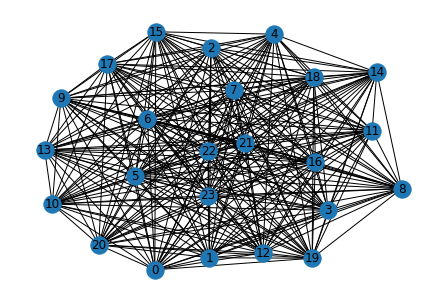

In [125]:
subgraph_adj1 = pd.read_csv('../Data/pctEmph_Adjacency.csv', index_col=0).to_numpy()
# subgraph_adj = pd.read_csv('../Data/trimmed_pctEmph_0.4_Adjacency.csv', index_col=0).to_numpy()
subgraph1 = nx.from_numpy_matrix(subgraph_adj1)
nx.draw(subgraph1, with_labels=True)
nx.density(subgraph1)
sorted_edges = sorted(subgraph1.edges(data=True), key=lambda x: x[2].get('weight', 1))
sorted_edges

In [126]:
edges_remove_ratios = np.linspace(0, 1, 500, endpoint=False)
# print(edges_remove_ratios)
for edges_remove_ratio in edges_remove_ratios:
    subgrapht = subgraph1.copy()
    # print("Number of Edges in the Original Graph is %s" % subgraph1.number_of_edges())
    # print("Network Density before is %s" % nx.density(subgrapht))

    num_edges_to_remove = int(subgraph1.number_of_edges() * edges_remove_ratio)
    # print("Number of Edges to Remove is %s" % num_edges_to_remove)
    sorted_edges = sorted(subgrapht.edges(data=True), key=lambda x: x[2].get('weight', 1))
    edges_to_remove = [(x1, x2) for (x1, x2, _) in sorted_edges[:num_edges_to_remove]]
    subgrapht.remove_edges_from(edges_to_remove)

    # print("Number of Edges in the Graph after is %s" % subgraph1.number_of_edges())

    if round(nx.density(subgrapht), 2) == 0.54:
        sorted_edges = sorted(subgrapht.edges(data=True), key=lambda x: x[2].get('weight', 1))
        print("Edge Ratio to remove is %s" % edges_remove_ratio)
        print(sorted_edges)
        print("Network Density after is %s" % nx.density(subgrapht))
        break

Edge Ratio to remove is 0.458
[(16, 17, {'weight': 0.0997032721013907}), (9, 16, {'weight': 0.099778928165457}), (1, 11, {'weight': 0.0999325682184339}), (0, 1, {'weight': 0.101273891714266}), (5, 10, {'weight': 0.101613816917794}), (7, 12, {'weight': 0.101642909151405}), (2, 17, {'weight': 0.101802366167433}), (7, 9, {'weight': 0.10273921181891}), (3, 15, {'weight': 0.10286779098923}), (2, 11, {'weight': 0.102994331735195}), (0, 16, {'weight': 0.103252331595389}), (0, 2, {'weight': 0.103279291135048}), (4, 19, {'weight': 0.103485391742662}), (6, 8, {'weight': 0.103734653058869}), (1, 17, {'weight': 0.103735805949339}), (15, 16, {'weight': 0.103840537072294}), (3, 18, {'weight': 0.104289636465999}), (7, 11, {'weight': 0.104313481580589}), (6, 10, {'weight': 0.104333233988556}), (5, 14, {'weight': 0.105157769936621}), (1, 15, {'weight': 0.105227604486261}), (16, 18, {'weight': 0.105419697458886}), (6, 14, {'weight': 0.10614891519424}), (7, 17, {'weight': 0.106271708035027}), (5, 8, {'we

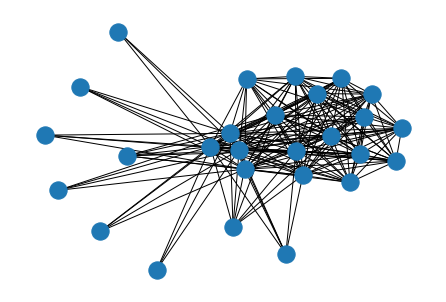

In [122]:
nx.draw(subgrapht)


In [192]:
# Reading the Input Dataset
original_dataset = pd.read_csv('../Data/trimmed_FEV1_0.55_X.csv', index_col=0).reset_index(drop='index')
dataset_associated_phenotype = pd.read_csv('../Data/trimmed_FEV1_0.55_Y.csv', index_col=0).reset_index(drop='index')
# dataset_associated_phenotype
original_dataset

# original_dataset = pd.read_csv('../Data/trimmed_pctEmph_0.4_X.csv', index_col=0).reset_index(drop='index')
# dataset_associated_phenotype = pd.read_csv('../Data/trimmed_pctEmph_0.4_Y.csv', index_col=0).reset_index(drop='index')
# # dataset_associated_phenotype
# original_dataset

,(N(1) + N(8))-acetylspermidine,5-acetylamino-6-amino-3-methyluracil,5-hydroxyhexanoate,adrenate (22:4n6),C-glycosyltryptophan,phosphocholine,ergothioneine,myristoleoylcarnitine (C14:1)*,"N2,N2-dimethylguanosine",X - 12026,...,Complement component C9,Carbonic anhydrase 6,Kallistatin,Beta-2-microglobulin,C-reactive protein,Growth/differentiation factor 15,"Alpha-(1,3)-fucosyltransferase 5",Trefoil factor 3,Troponin T,N-terminal pro-BNP
0,-0.190253,2.198677,0.951882,1.728713,1.696511,1.810291,-1.921257,0.875180,0.892684,0.124223,...,0.322382,-1.118447,-0.234189,0.926362,0.557443,0.017068,-0.382598,0.234377,0.593199,1.282038
1,1.137203,-0.556750,1.417606,0.412620,0.341081,0.396214,-0.667501,1.829685,-0.880821,-1.277666,...,0.226270,-0.377116,-1.673974,0.100996,0.220795,-0.145500,-0.386756,-0.132752,-0.795531,-0.020434
2,-0.852246,0.353310,0.415074,0.528622,0.050416,0.134069,0.375303,0.350066,-2.254200,-0.518312,...,-0.428367,0.574186,-0.634489,-0.364988,0.629139,0.187559,-1.008337,-0.288907,-0.917175,-0.896100
3,0.247807,0.975486,-1.502064,0.469000,0.333686,-0.163554,-0.732381,0.195025,-0.199153,-0.187908,...,-0.409941,-0.775491,-0.197459,-0.731378,1.171704,-1.459689,2.014551,-0.646074,0.414110,-1.828103
4,-0.366317,-1.130497,0.858598,-0.866032,-0.241559,0.173388,-0.236713,1.537696,-1.105873,-1.534229,...,0.660275,0.204040,-0.372867,0.890467,-0.852658,1.371039,1.157176,0.630683,0.051998,2.123272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0.829446,0.050146,-2.103680,-0.102467,-0.408373,-0.135074,1.477414,-1.314134,0.006312,-0.615117,...,-1.925122,-0.239220,1.567190,0.312708,-3.290274,-0.639323,-1.808501,-0.282904,-0.152816,0.776388
992,-0.209134,-0.472576,0.019962,-1.653494,-0.981828,1.120985,0.874699,0.033871,-0.957397,-1.584809,...,0.294543,-0.309081,-0.945435,-0.337557,1.224334,-0.182733,0.960652,-0.789511,-0.684374,1.373968
993,-0.098917,-1.349235,1.152642,-0.118369,-0.103682,1.691015,-0.610257,0.828027,0.085634,-0.500804,...,-0.173596,0.309346,-0.362805,-1.158474,0.221569,-1.306005,0.326384,-0.922360,-0.366161,-1.541756
994,-2.186909,-0.205182,-0.552108,-0.625187,-0.446872,2.273861,0.261602,-0.991433,-0.777158,-0.851403,...,0.294511,-2.127945,0.022630,-0.590303,1.132313,-1.366281,-0.561698,-0.902983,-0.610586,-0.965605


In [193]:
subgraph_adj = pd.read_csv('../Data/FEV1_Adjacency.csv', index_col=0).to_numpy()
# subgraph_adj = pd.read_csv('../Data/trimmed_pctEmph_0.4_Adjacency.csv', index_col=0).to_numpy()
subgraph = nx.from_numpy_matrix(subgraph_adj)

# Extracting the Network Nodes Names
subgraph_nodes_dict = {}
subgraph_nodes_names = []
for subgraph_node in subgraph.nodes():
    subgraph_node_name = original_dataset.iloc[:0, subgraph_node].name
    subgraph_nodes_names.append(subgraph_node_name)
    subgraph_nodes_dict[subgraph_node] = subgraph_node_name

In [194]:
nx.density(subgraph)

1.0

In [195]:
def evaluate_node_embeddings(subgraph, params):
    """
    1. Runs Node2Vec Algorithm to Generate Nodes Embeddings.
    2. Adds Nodes Embeddings to Original Dataset.
    3. Evaluates the Quality of the Embeddings (Correlation of PC1 with the Phenotype & Percentage of Variance Explained by PC1).
    :param params:
    :return:
    """
    node2vec = Node2Vec(subgraph, dimensions=params['dimensions'], walk_length=params['walk_length'], num_walks=params['num_walks'], weight_key='weight', p=params['p'], q=params['q'], quiet=True)
    try:
        model = node2vec.fit()
        model.wv.save_word2vec_format('SubgraphNodesEmbeddings_FEV1.embd')
        subgraph_nodes_embeddings = pd.read_csv('SubgraphNodesEmbeddings_FEV1.embd', delim_whitespace=True, names = range(params['dimensions']), skiprows=1)
        subgraph_nodes_embeddings = subgraph_nodes_embeddings.T

        subgraph_nodes_dict_inv = dict((v, k) for k, v in subgraph_nodes_dict.items())
        original_dataset_with_embeddings_df = pd.DataFrame(index=range(0, len(patients_representation)))
        columns_names = patients_representation.columns

        for column_name in columns_names:
            # Get the Metabolite or Protein Embedding Created using Node2Vec
            subgraph_node_embedding = subgraph_nodes_embeddings[subgraph_nodes_dict_inv[column_name]]
            column_value = patients_representation[column_name]
            z = [[vy * vx for ix, vx in enumerate(subgraph_node_embedding)] for iy, vy in enumerate(column_value)]
            original_dataset_with_embeddings_df = pd.concat([original_dataset_with_embeddings_df, pd.DataFrame(z)], axis=1)

        original_dataset_with_embeddings_df.columns = range(0, len(patients_representation.columns)*params['dimensions'])

        pca = PCA()
        pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
        Xt = pca.fit_transform(original_dataset_with_embeddings_df)
        PC1 = Xt[:,0]

        explained_variance_ratio = pca.explained_variance_ratio_
        PC1_df = pd.DataFrame(PC1)

        # dataset_associated_phenotype_df = pd.DataFrame(np.array(dataset_associated_phenotype.filter(items=list(patients_representation.index), axis=0)['FEV1pp_utah']),
        #                                                index=[i for i in range(len(patients_representation))])
        PC1_correlation_with_phenotype = PC1_df.corrwith(dataset_associated_phenotype_df).tolist()[0]
        # PC1_correlation_with_phenotype = PC1_df.corrwith(dataset_associated_phenotype['pctEmph']).tolist()[0]
        return [params, abs(PC1_correlation_with_phenotype), explained_variance_ratio[0], sum(explained_variance_ratio[:10])]
    except Exception as E:
        print("Exception %s" % E)
        pass

In [196]:
param_grid = {
    'dimensions': 2,
    'walk_length' : 2,
    'num_walks': 256,
    'p': 100,
    'q': 0.4,
}
dataset_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 996]
for dataset_size in dataset_sizes:
    print("----- Dataset Size %s -----" % dataset_size)
    PC1_correlation_with_phenotype = []
    explained_variance_ratio = []
    explained_variance_ratio_10_PCs = []

    PC1_correlation_with_phenotype_with_embeddings = []
    explained_variance_ratio_with_embeddings = []
    explained_variance_ratio_10_PCs_with_embeddings = []

    for iteration in range(1000):
        dataset = original_dataset.sample(n=dataset_size)
        patients_representation = dataset[list(subgraph_nodes_names)]

        # PCA on the Original Dataset (No Network Structure Information Captured)
        pca = PCA()
        pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
        Xt = pca.fit_transform(patients_representation)
        PC1 = Xt[:,0]
        PC2 = Xt[:,1]

        explained_variance_ratio.append(pca.explained_variance_ratio_[0])
        explained_variance_ratio_10_PCs.append(sum(explained_variance_ratio[:10]))
        dataset_associated_phenotype_df = pd.DataFrame(np.array(dataset_associated_phenotype.filter(items=list(patients_representation.index), axis=0)['FEV1pp_utah']),
                                                       index=[i for i in range(len(patients_representation))])
        PC1_correlation_with_phenotype.append(abs(pd.DataFrame(PC1).corrwith(dataset_associated_phenotype_df)).tolist()[0])
        # print("PC1 Correlation before %s" % PC1_correlation_with_phenotype)

        evaluation_results = evaluate_node_embeddings(subgraph, param_grid)
        PC1_correlation_with_phenotype_with_embeddings.append(evaluation_results[1])
        explained_variance_ratio_with_embeddings.append(evaluation_results[2])
        explained_variance_ratio_10_PCs_with_embeddings.append(evaluation_results[3])
        # print("Evaluation Results %s" % evaluation_results)

    print("Mean Explained Variance Ratio by PC1 %s" % (statistics.mean(explained_variance_ratio)))
    # print("Mean Explained Variance Ratio by the First 10 PCs %s" % statistics.mean(explained_variance_ratio_10_PCs))

    # print("Mean PC1 Correlation with Phenotype %s" % statistics.mean(PC1_correlation_with_phenotype))

    print("Standard Deviation of PVE by PC1 %s" % statistics.pstdev(explained_variance_ratio))
    # print("Standard Deviation of PVE by the First 10 PCs %s" % statistics.pstdev(explained_variance_ratio_10_PCs))
    # print("Standard Deviation of PC1 Correlation with the Phenotype %s" % statistics.pstdev(PC1_correlation_with_phenotype))

    print("Mean Explained Variance Ratio by PC1 with Embeddings %s" % statistics.mean(explained_variance_ratio_with_embeddings))
    # print("Mean Explained Variance Ratio by the First 10 PCs with Embeddings %s" % statistics.mean(explained_variance_ratio_10_PCs_with_embeddings))
    # print("Mean PC1 Correlation with Phenotype with Embeddings %s" % statistics.mean(PC1_correlation_with_phenotype_with_embeddings))

    print("Standard Deviation of PVE by PC1 with Embeddings %s" % statistics.pstdev(explained_variance_ratio_with_embeddings))
    # print("Standard Deviation of PVE by the First 10 PCs with Embeddings %s" % statistics.pstdev(explained_variance_ratio_10_PCs_with_embeddings))
    # print("Standard Deviation of PC1 Correlation with the Phenotype with Embeddings %s" % statistics.pstdev(PC1_correlation_with_phenotype_with_embeddings))
    print("-----------------------------------------------------------------------------------------------------------")

----- Dataset Size 50 -----
Mean Explained Variance Ratio by PC1 0.3176159115053963
Standard Deviation of PVE by PC1 0.055433929534615005
Mean Explained Variance Ratio by PC1 with Embeddings 0.3550973086929935
Standard Deviation of PVE by PC1 with Embeddings 0.06402108473112844
-----------------------------------------------------------------------------------------------------------
----- Dataset Size 100 -----
Mean Explained Variance Ratio by PC1 0.31061349640805375
Standard Deviation of PVE by PC1 0.039166026937927916
Mean Explained Variance Ratio by PC1 with Embeddings 0.3485733479786142
Standard Deviation of PVE by PC1 with Embeddings 0.050421355302134416
-----------------------------------------------------------------------------------------------------------
----- Dataset Size 200 -----
Mean Explained Variance Ratio by PC1 0.3074956606645079
Standard Deviation of PVE by PC1 0.02742549441912437
Mean Explained Variance Ratio by PC1 with Embeddings 0.34589968010477534
Standard Dev